### <strong>本章介绍opencv的基础核心图像操作</strong>

In [4]:
# 导入必要的包
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 构建展示函数
def show(img,title = 'Test'):
    cv2.imshow(title,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

**一，获取并修改图像属性**

In [13]:
# 获取并修改图像属性

img = cv2.imread('images/lena.jpg')
# show(img)

# 输出单个像素
x = img[100,100] # 获取图像信息是100,100 是逗号
print(x)

# 输入单个像素的单个颜色通道
print(img[10,10,2]) # 输出r通道

# 图像属性修改
img[100,100] = [50,13,130]
print(img[100,100])

[121 108 200]
224
[ 50  13 130]


**二，获取图像属性**  
图像的属性包括：行，列，通道，图像数据类型，像素数目等

In [21]:
# 图像的形状
print(img.shape)

# 图像的像素数目，即矩阵含元素数量
print(img.size)

# 图像的数据类型
print(img.dtype)

# 变量类型
print(type(img))

(263, 263, 3)
207507
uint8
<class 'numpy.ndarray'>


**三，图像ROI**  
无代码，仅看结果

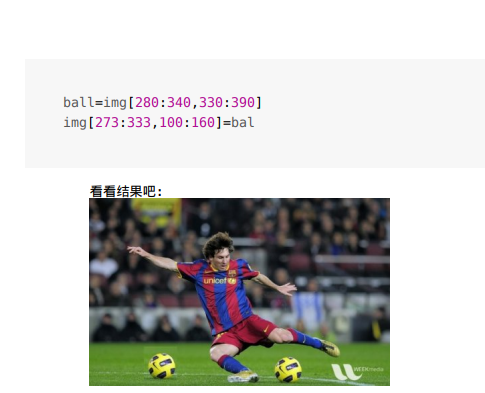

**四，拆分及合并颜色通道**

In [32]:
img = cv2.imread('images/lena.jpg')

# 通道拆分
b,g,r = cv2.split(img)
print(b,g,r)

# 通道合并
img_merge = cv2.merge([g,r,b])
show(img_merge)

# 仅获取一个通道,numpy的快速运算
b = img[:,:,0]
print(b)

# 为某个通道赋值
img[:,:,0] = 0
show(img)

"""
cv2.split() 是一个比较耗时的操作。只有真正需要时才用它，能用
Numpy 索引就尽量用
"""

[[126 125 124 ... 128 120  90]
 [127 126 124 ... 135 131  96]
 [124 123 121 ... 144 138  96]
 ...
 [ 59  61  59 ...  80  79  80]
 [ 56  60  55 ...  85  87  80]
 [ 51  63  58 ...  85  90  88]] [[134 133 133 ... 148 148 118]
 [137 136 133 ... 150 152 117]
 [135 137 134 ... 150 143 100]
 ...
 [ 25  27  26 ...  61  62  64]
 [ 22  26  22 ...  67  71  67]
 [ 17  29  25 ...  68  76  75]] [[223 222 223 ... 235 232 202]
 [225 224 223 ... 236 234 198]
 [225 226 226 ... 233 222 178]
 ...
 [ 90  92  93 ... 148 153 158]
 [ 87  91  89 ... 156 165 165]
 [ 82  94  92 ... 159 172 177]]
[[126 125 124 ... 128 120  90]
 [127 126 124 ... 135 131  96]
 [124 123 121 ... 144 138  96]
 ...
 [ 59  61  59 ...  80  79  80]
 [ 56  60  55 ...  85  87  80]
 [ 51  63  58 ...  85  90  88]]


'\ncv2.split() 是一个比较耗时的操作。只有真正需要时才用它，能用\nNumpy 索引就尽量用\n'

**五，图像边界扩充**  
• src 输入图像  
• top, bottom, left, right 对应边界的像素数目。  
• borderType 要添加那种类型的边界，类型如下  


In [34]:
# 仅展示一种扩充，更多的见官方文档
img = cv2.imread('images/lena.jpg')
show(img)
img_out = cv2.copyMakeBorder(img,20,20,20,20,cv2.BORDER_ISOLATED)
show(img_out)

##### **六，图像的算术运算(难点)**

**(1)图像的加法**  
OpenCV 中的加法与 Numpy 的加法是有所不同的。  
OpenCV 的加法是一种饱和操作，而 Numpy 的加法是一种模操作

**(2)图像的融合**  
必要前提:图片的类型及大小一致 

**(3)按位运算（暂时不理解）**

In [45]:
cat = cv2.imread('images/cat.jpg')
dog = cv2.imread('images/dog.jpg')

# 直接融合
cat_h,cat_w,a = cat.shape
print(cat_h,cat_w)
dog = cv2.resize(dog,(cat_w,cat_h)) # 尺寸是w x h
conbination = cv2.add(cat,dog)
show(conbination)

# 权重融合
conbination = cv2.addWeighted(cat,0.5,dog,0.5,0) # 最后一个参数是偏置数
show(conbination)

414 500
